In [1]:
import keras
import numpy as np
from sklearn import model_selection, preprocessing, metrics, utils
import pandas as pd
import matplotlib.pyplot as plt
import fraudutils as futils
rs = 1

Using TensorFlow backend.


In [2]:
def plot_results(p1, p2, legend):
    plt.title(legend)
    plt.plot(p1)
    plt.plot(p2)
    plt.legend([legend, 'Validation ' + legend])
    plt.ylabel(legend)
    plt.xlabel('Epochs')
    plt.show()

In [3]:
train, test, val = futils.load_train_test_val_dataset('../../../data/processed/give-me-some-credit/')

X_train = train.drop(['SeriousDlqin2yrs'], axis=1)
y_train = train['SeriousDlqin2yrs']

X_test = test.drop(['SeriousDlqin2yrs'], axis=1)
y_test = test['SeriousDlqin2yrs']

X_val = val.drop(['SeriousDlqin2yrs'], axis=1)
y_val = val['SeriousDlqin2yrs']

In [4]:
class AUCCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.train_aucroc = []
        self.test_aucroc = []
        
    def on_epoch_end(self, epoch, logs={}):
        
        prediction_train = model.predict_classes(X_train)
        prediction_test = model.predict_classes(X_test)
        
        aucroc_train = metrics.roc_auc_score(y_train, prediction_train)
        aucroc_test = metrics.roc_auc_score(y_test, prediction_test)
        
        print("Aucroc train: {0:.4f}, Aucroc test: {1:.4f}\n".format(aucroc_train, aucroc_test))
        
        self.train_aucroc.append(aucroc_train)
        self.test_aucroc.append(aucroc_test)   
        
auc_callback = AUCCallback()

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(10,)))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(10))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(10))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [6]:
results = model.fit(X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=20, 
                    batch_size=256, 
                    verbose=2,
                    callbacks=[auc_callback])

Train on 90000 samples, validate on 45000 samples
Epoch 1/20
 - 1s - loss: 0.3065 - acc: 0.9332 - val_loss: 0.2378 - val_acc: 0.9332
Aucroc train: 0.5000, Aucroc test: 0.5000

Epoch 2/20
 - 1s - loss: 0.2365 - acc: 0.9332 - val_loss: 0.2327 - val_acc: 0.9333
Aucroc train: 0.5065, Aucroc test: 0.5070

Epoch 3/20
 - 1s - loss: 0.2316 - acc: 0.9332 - val_loss: 0.2266 - val_acc: 0.9333
Aucroc train: 0.5065, Aucroc test: 0.5070

Epoch 4/20
 - 1s - loss: 0.2237 - acc: 0.9332 - val_loss: 0.2156 - val_acc: 0.9333
Aucroc train: 0.5067, Aucroc test: 0.5072

Epoch 5/20
 - 1s - loss: 0.2112 - acc: 0.9338 - val_loss: 0.2021 - val_acc: 0.9349
Aucroc train: 0.5318, Aucroc test: 0.5340

Epoch 6/20
 - 1s - loss: 0.2002 - acc: 0.9352 - val_loss: 0.1946 - val_acc: 0.9364
Aucroc train: 0.5766, Aucroc test: 0.5806

Epoch 7/20
 - 1s - loss: 0.1957 - acc: 0.9357 - val_loss: 0.1923 - val_acc: 0.9359
Aucroc train: 0.5933, Aucroc test: 0.5970

Epoch 8/20
 - 1s - loss: 0.1941 - acc: 0.9355 - val_loss: 0.1935 - v

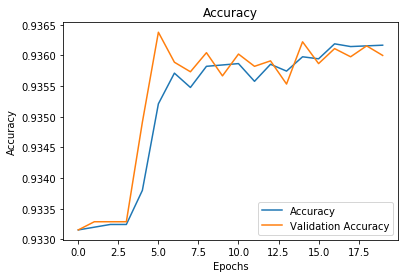

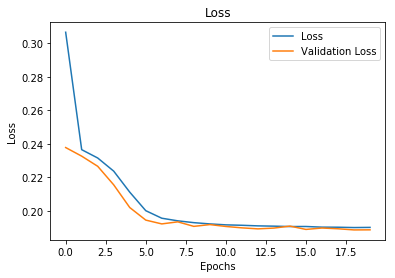

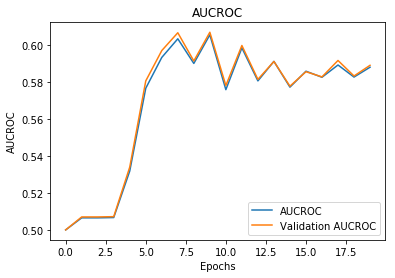

In [7]:
plot_results(results.history['acc'], results.history['val_acc'], 'Accuracy')
plot_results(results.history['loss'], results.history['val_loss'], 'Loss')
plot_results(auc_callback.train_aucroc, auc_callback.test_aucroc, 'AUCROC')

In [8]:
from collections import Counter
prediction_counter = Counter([x[0] for x in model.predict_classes(X_val)])
real_counter = Counter(y_val)
print("Prediction: {}\nReal: {}".format(prediction_counter, real_counter))

Prediction: Counter({0: 14660, 1: 340})
Real: Counter({0: 13998, 1: 1002})


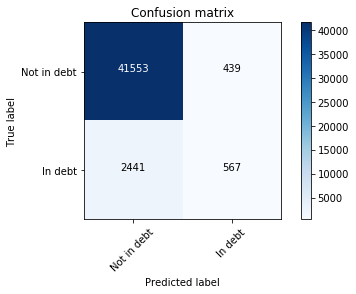

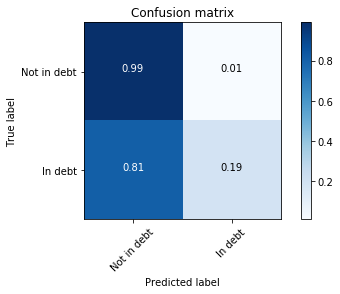

In [9]:
prediction = model.predict_classes(X_test)
cm = futils.confusion_matrix(y_test, prediction)
futils.plot_confusion_matrix(cm, classes=['Not in debt', 'In debt'])
futils.plot_confusion_matrix(cm, classes=['Not in debt', 'In debt'], normalize=True)

## Applying Oversampling

In [10]:
import imblearn.over_sampling

In [11]:
smote = imblearn.over_sampling.SMOTE(random_state=rs)

In [12]:
X_train_oversampled, y_train_oversampled = smote.fit_sample(X_train, y_train)

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(10,)))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(10))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(10))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [14]:
results = model.fit(X_train_oversampled, 
                    y_train_oversampled, 
                    validation_data=(X_test, y_test), 
                    epochs=20, 
                    batch_size=256, 
                    verbose=2,
                    callbacks=[auc_callback])

Train on 167968 samples, validate on 45000 samples
Epoch 1/20
 - 2s - loss: 0.6590 - acc: 0.6056 - val_loss: 0.6231 - val_acc: 0.6301
Aucroc train: 0.6457, Aucroc test: 0.6620

Epoch 2/20
 - 1s - loss: 0.5819 - acc: 0.6959 - val_loss: 0.6340 - val_acc: 0.7176
Aucroc train: 0.7304, Aucroc test: 0.7345

Epoch 3/20
 - 1s - loss: 0.5305 - acc: 0.7475 - val_loss: 0.6721 - val_acc: 0.6979
Aucroc train: 0.7353, Aucroc test: 0.7349

Epoch 4/20
 - 1s - loss: 0.5146 - acc: 0.7607 - val_loss: 0.4112 - val_acc: 0.8484
Aucroc train: 0.7512, Aucroc test: 0.7550

Epoch 5/20
 - 1s - loss: 0.5071 - acc: 0.7663 - val_loss: 0.6640 - val_acc: 0.6983
Aucroc train: 0.7382, Aucroc test: 0.7353

Epoch 6/20
 - 2s - loss: 0.5020 - acc: 0.7712 - val_loss: 0.4381 - val_acc: 0.8276
Aucroc train: 0.7526, Aucroc test: 0.7573

Epoch 7/20
 - 1s - loss: 0.4978 - acc: 0.7756 - val_loss: 0.4249 - val_acc: 0.8245
Aucroc train: 0.7523, Aucroc test: 0.7563

Epoch 8/20
 - 2s - loss: 0.4935 - acc: 0.7807 - val_loss: 0.3746 - 

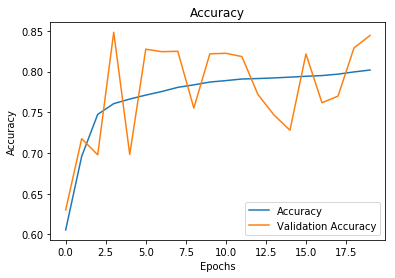

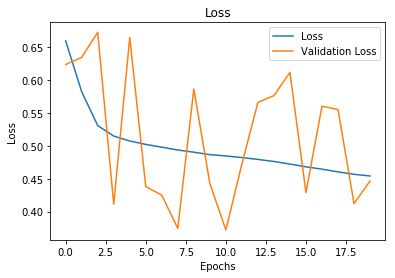

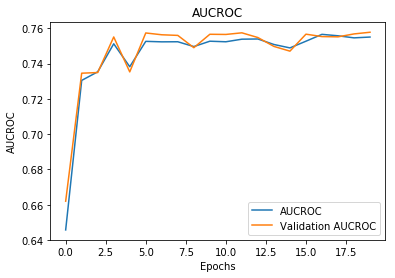

In [15]:
plot_results(results.history['acc'], results.history['val_acc'], 'Accuracy')
plot_results(results.history['loss'], results.history['val_loss'], 'Loss')
plot_results(auc_callback.train_aucroc, auc_callback.test_aucroc, 'AUCROC')

In [16]:
from collections import Counter
prediction_counter = Counter([x[0] for x in model.predict_classes(X_val)])
real_counter = Counter(y_val)
print("Prediction: {}\nReal: {}".format(prediction_counter, real_counter))


Prediction: Counter({0: 12337, 1: 2663})
Real: Counter({0: 13998, 1: 1002})


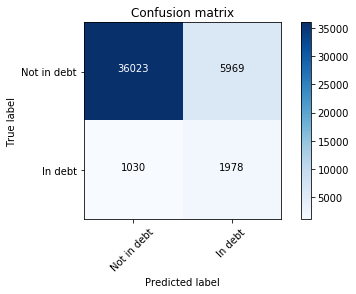

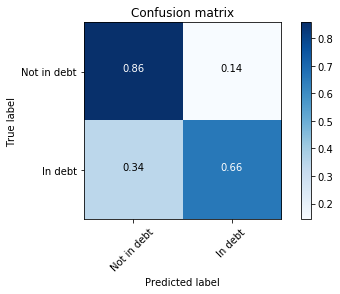

In [17]:
prediction = model.predict_classes(X_test)
cm = futils.confusion_matrix(y_test, prediction)
futils.plot_confusion_matrix(cm, classes=['Not in debt', 'In debt'])
futils.plot_confusion_matrix(cm, classes=['Not in debt', 'In debt'], normalize=True)